<img width="8%" alt="Naas.png" src="https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/.github/assets/logos/Naas.png" style="border-radius: 15%">

# Tool - Action of the notebook

**Tags:** #tool

**Author:** [Firstname Lastname](https://www.linkedin.com/)

**Last update:** YYYY-MM-DD (Created: YYYY-MM-DD)

**Description:** This notebook demonstrates how to ... -> a one-liner explaining the benefits of the notebooks for the user, as text.

**References:**
- [Naas Documentation](https://site.naas.ai/)

## Input

### Import libraries
Libraries to be used within the notebook.<br>
If these libraries are not installed on Naas, ensure they are installed during the first execution by using a `try`/`except` function to import the package.

In [13]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy import square, sqrt
from pandas import DataFrame

In [14]:
# Enable inline mode for matplotlib so that IPython displays graphs.
%matplotlib inline

### Setup variables
Variables used in this notebook should be categorized as either mandatory or optional and should be clearly described. The aim of defining these variables in the input section is to facilitate use of the notebook by any user, allowing them to interact with it without the need to modify functions in the model section.


**Mandatory**

- `stock_name`: This variable represents the stock symbol for which you want to fetch data. In this case, 'NFLX' stands for Netflix.


**Optional**

- `date_from`: This variable defines the starting date from which you want to fetch the stock data. It's set to '-3600', which likely represents 3600 days before the current date.
- `date_to`: This variable defines the end date up to which you want to fetch the stock data. When set to 'today', it fetches data up to the current date.
- `moving_averages`: This is a list of integers representing the number of days for which you want to calculate the moving average of the stock price. In this case, moving averages will be calculated for the past 20 and 50 days.
- `csv_output`: This variable represents the name of the CSV file where the fetched data will be saved. In this case, the file will be named 'MY_OUTPUT.csv'.

In [15]:
# get data from text file
df = pd.read_csv("dataset.csv")

#drop ID column
df = df.drop(df.columns[0], axis=1)

df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


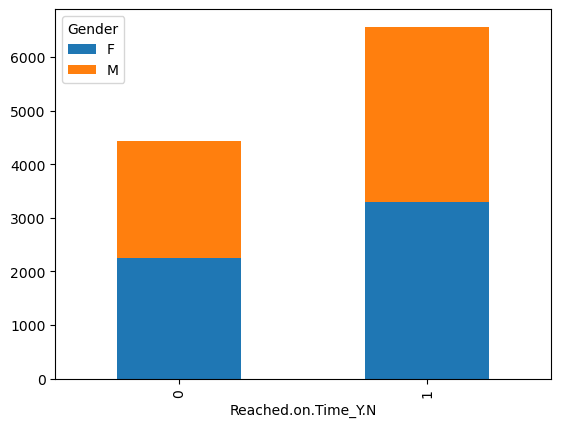

Chi-squared statistic: [0.86654644 0.12814262]
p-value: [0.35191318 0.72036566]


In [16]:
from scipy.stats import chisquare

gender_vs_time = df.groupby(['Gender', 'Reached.on.Time_Y.N']).size().unstack().T


gender_vs_time.plot(kind='bar', stacked=True)

# Display the graph
plt.show()

#probably drop gender, roughly equal

tab = pd.crosstab(df['Gender'], df['Reached.on.Time_Y.N'])

chi, p_value = chisquare(tab)

print("Chi-squared statistic:", chi)
print("p-value:", p_value)

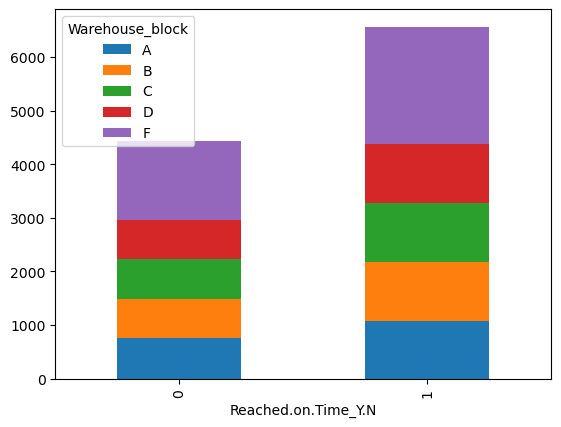

Chi-squared statistic: [482.34310189 740.16090203]
p-value: [4.41214072e-103 7.00761672e-159]


In [17]:
ware_vs_time = df.groupby(['Warehouse_block', 'Reached.on.Time_Y.N']).size().unstack().T


ware_vs_time.plot(kind='bar', stacked=True)

# Display the graph
plt.show()

tab = pd.crosstab(df['Warehouse_block'], df['Reached.on.Time_Y.N'])

chi, p_value = chisquare(tab)

print("Chi-squared statistic:", chi)
print("p-value:", p_value)

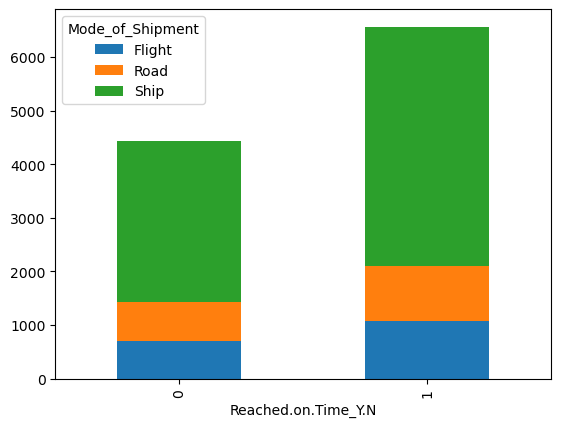

Chi-squared statistic: [2357.21325518 3537.56391894]
p-value: [0. 0.]


In [18]:
mode_vs_time = df.groupby(['Mode_of_Shipment', 'Reached.on.Time_Y.N']).size().unstack().T


mode_vs_time.plot(kind='bar', stacked=True)

# Display the graph
plt.show()

tab = pd.crosstab(df['Mode_of_Shipment'], df['Reached.on.Time_Y.N'])

chi, p_value = chisquare(tab)

print("Chi-squared statistic:", chi)
print("p-value:", p_value)

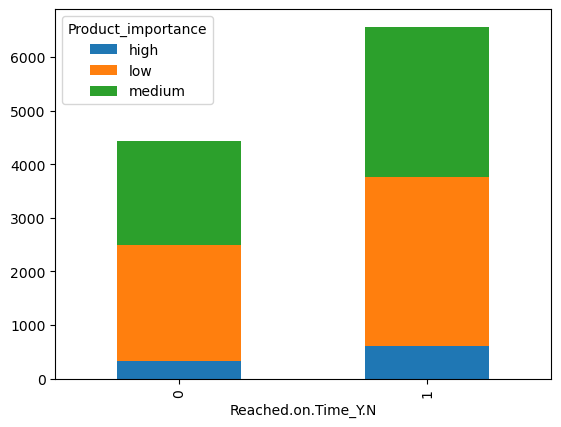

Chi-squared statistic: [1348.72633003 1719.02270303]
p-value: [1.34214252e-293 0.00000000e+000]


In [19]:
importance_vs_time = df.groupby(['Product_importance', 'Reached.on.Time_Y.N']).size().unstack().T
importance_vs_time.plot(kind='bar', stacked=True)

# Display the graph
plt.show()

tab = pd.crosstab(df['Product_importance'], df['Reached.on.Time_Y.N'])

chi, p_value = chisquare(tab)

print("Chi-squared statistic:", chi)
print("p-value:", p_value)

## Model

In [20]:
#Dropping Gender, Customer Rating, Customer_care_calls, Prior Purchases

In [21]:
df.drop(['Gender', 'Customer_rating', 'Customer_care_calls', 'Prior_purchases'], axis=1, inplace=True)
print(df.head())

  Warehouse_block Mode_of_Shipment  Cost_of_the_Product Product_importance  \
0               D           Flight                  177                low   
1               F           Flight                  216                low   
2               A           Flight                  183                low   
3               B           Flight                  176             medium   
4               C           Flight                  184             medium   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1  


# Anamoly Detection


Anamoly Detection is used to eliminate "anamolies" in the records in hopes to present the best training set and increase the accuracy. 

## Isolation Forest

The isolation forest method is a great method for detecting anomalies, specifically in datasets with multiple features. It works well for high-dimensional datasets.

In [22]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.01), random_state=42)
pred = clf.fit_predict(df[['Cost_of_the_Product', 'Weight_in_gms']])
df['anomaly'] = pred
outliers = df[df['anomaly'] == -1]

print("Anomaly Rows:\n", outliers)

Anomaly Rows:
       Warehouse_block Mode_of_Shipment  Cost_of_the_Product  \
62                  A             Ship                  105   
77                  F             Ship                  113   
151                 F           Flight                   98   
152                 A           Flight                   97   
160                 C             Ship                  112   
...               ...              ...                  ...   
10010               A           Flight                  105   
10034               A             Ship                  102   
10322               A             Ship                   96   
10615               F             Ship                  100   
10622               A             Ship                   98   

      Product_importance  Discount_offered  Weight_in_gms  \
62                medium                62           1292   
77                   low                43           1518   
151               medium                44   

In [24]:
# dropping the anamolies
anomaly_indices = df[df['anomaly'] == -1].index
df = df.drop(anomaly_indices)
print(df)

      Warehouse_block Mode_of_Shipment  Cost_of_the_Product  \
0                   D           Flight                  177   
1                   F           Flight                  216   
2                   A           Flight                  183   
3                   B           Flight                  176   
4                   C           Flight                  184   
...               ...              ...                  ...   
10994               A             Ship                  252   
10995               B             Ship                  232   
10996               C             Ship                  242   
10997               F             Ship                  223   
10998               D             Ship                  155   

      Product_importance  Discount_offered  Weight_in_gms  \
0                    low                44           1233   
1                    low                59           3088   
2                    low                48           3374   

### Get data from yahoo finance

In [ ]:
df = yahoofinance.get(
    stock_name,
    date_from=date_from,
    date_to=date_to,
    moving_averages=moving_averages
)
df

## Output

### Save DataFrame to csv

In [ ]:
df.to_csv(csv_output, index=False)